# Part B:

In [27]:
pip install torch torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/12/c2/7c89c62f2b0a606070aa7cdb8af8af0c905562942778ebdd77600642c3b9/torchvision-0.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.18.0-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/2a/b7/a3cf5fd40334b9785cc83ee0c96b50603026eb3aa70210a33729018e7029/torch-2.3.0-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.0-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466f0ea8d48ce9efae39bd2ff38cebf8dce61259/mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Obtaining dependency information for intel-openmp==2021.* from https://files.pythonhosted.org/packages/6f/21/b590c0cc3888b24f2ac989

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [4]:
#importing all required libraries
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np
import pandas as pd 
from torchvision import models
import glob
import os
import random
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
#importing torch libraries 
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18, densenet121, vgg19
from torch.utils.data import DataLoader
from sklearn.metrics import precision_recall_fscore_support

C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
# paths for the data sets
extracted_path = 'dataset1/dataset'
train_path = 'dataset1/train'
test_path = 'dataset1/test'

# 1.	For each class, treat images from 0001 to 0040 as train and the remaining as test.

# Dataset Preparation:

In [3]:
# Create directories for training and testing sets
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)


In [6]:
# Organize the dataset
categories = os.listdir(extracted_path)

for category in categories:
    category_full_path = os.path.join(extracted_path, category)
    if not os.path.isdir(category_full_path):
        continue
    
    # Create category directories in train and test folders
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)
    
    # Get all image files in the category
    images = sorted(os.listdir(category_full_path))
    
    # Split the images into train (0001 to 0040) and test sets
    train_images = images[:40]
    test_images = images[40:]
    
    # Move train images
    for image in train_images:
        src = os.path.join(category_full_path, image)
        dst = os.path.join(train_path, category, image)
        print(f"Moving {src} to {dst}")
        shutil.move(src, dst)
        
    # Move test images
    for image in test_images:
        src = os.path.join(category_full_path, image)
        dst = os.path.join(test_path, category, image)
        print(f"Moving {src} to {dst}")
        shutil.move(src, dst)

print("Dataset organized into training and testing sets.")


Dataset organized into training and testing sets.


In [7]:
class CustomDataset:
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.files = []
        for class_idx, class_name in enumerate(self.classes):
            class_files = glob.glob(os.path.join(root_dir, class_name, '*'))
            self.files.extend([(file, class_idx) for file in class_files])
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        img_path, label = self.files[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


train_dataset = CustomDataset(root_dir=train_path)
test_dataset = CustomDataset(root_dir=test_path)

# To create data loaders:


train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [8]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224 pixels
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Add transform to the dataset
train_dataset.transform = transform
test_dataset.transform = transform

In [9]:
import torch

# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs, labels = inputs.to(device), labels.to(device)

NameError: name 'model' is not defined

# Model Loading

In [10]:
# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Number of classes in your dataset
num_classes = 15

# Load and modify a pretrained ResNet18 model
model_resnet = models.resnet18(pretrained=True)
model_resnet.fc = nn.Linear(model_resnet.fc.in_features, num_classes)
model_resnet.to(device)

# Load and modify a pretrained DenseNet121 model
model_densenet = models.densenet121(pretrained=True)
model_densenet.classifier = nn.Linear(model_densenet.classifier.in_features, num_classes)
model_densenet.to(device)

# Load and modify a pretrained VGG19 model
model_vgg = models.vgg19(pretrained=True)
model_vgg.classifier[6] = nn.Linear(model_vgg.classifier[6].in_features, num_classes)
model_vgg.to(device)

print("Models are defined and moved to the device successfully.")

C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most 

Models are defined and moved to the device successfully.


# Model Training

In [36]:
#trains the model by loading data from different datasets iterates over epoches and returns a dataframe of results with metrics
def train_model(model, train_loader, test_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Initialize lists to store metrics for DataFrame
    epochs = []
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    precisions = []
    recalls = []
    
    for epoch in range(num_epochs): #iterating over epoches
        model.train()
        total_train = 0
        correct_train = 0
        train_loss = 0
        
        # Train the model
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        
        # Evaluate the model
        model.eval()
        test_loss = 0
        total_test = 0
        correct_test = 0
        all_labels = []
        all_preds = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())
        
        avg_test_loss = test_loss / len(test_loader)
        test_accuracy = 100 * correct_test / total_test
        
        # Calculate per-class precision and recall
        precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_preds, average=None, zero_division=0)
        
        # Append results for this epoch
        epochs.append(epoch + 1)
        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        precisions.append(precision.tolist())  # Convert to list for DataFrame compatibility
        recalls.append(recall.tolist())

        print(f'Epoch {epoch+1}/{num_epochs} - Train Accuracy: {train_accuracy:.2f}% Test Accuracy: {test_accuracy:.2f}%')

    # Create DataFrame
    results_df = pd.DataFrame({
        'Epoch': epochs,
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accuracies,
        'Test Accuracy': test_accuracies,
        'Precision per Class': precisions,
        'Recall per Class': recalls
    })

    return model, results_df

Train the models

In [24]:
model_resnets = train_model(model_resnet, train_loader, test_loader) #resnetmodel_train

Epoch 1/10 - Train Accuracy: 72.67% Test Accuracy: 71.22%
Epoch 2/10 - Train Accuracy: 91.17% Test Accuracy: 78.54%
Epoch 3/10 - Train Accuracy: 93.83% Test Accuracy: 83.41%
Epoch 4/10 - Train Accuracy: 95.67% Test Accuracy: 80.00%
Epoch 5/10 - Train Accuracy: 96.50% Test Accuracy: 78.54%
Epoch 6/10 - Train Accuracy: 96.17% Test Accuracy: 81.95%
Epoch 7/10 - Train Accuracy: 97.00% Test Accuracy: 83.90%
Epoch 8/10 - Train Accuracy: 97.67% Test Accuracy: 87.80%
Epoch 9/10 - Train Accuracy: 97.17% Test Accuracy: 89.27%
Epoch 10/10 - Train Accuracy: 98.17% Test Accuracy: 87.80%


In [26]:
#model summary
model_resnets[0]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
model_resnets[1]

Epoch  Train Loss  Test Loss  Train Accuracy  Test Accuracy  \
0      1    0.823880   1.461977       72.666667      71.219512   
1      2    0.275261   0.921975       91.166667      78.536585   
2      3    0.194118   0.482581       93.833333      83.414634   
3      4    0.151174   0.675192       95.666667      80.000000   
4      5    0.126762   0.702779       96.500000      78.536585   
5      6    0.135146   0.612184       96.166667      81.951220   
6      7    0.098257   0.533180       97.000000      83.902439   
7      8    0.075423   0.503371       97.666667      87.804878   
8      9    0.086279   0.403242       97.166667      89.268293   
9     10    0.058437   0.497796       98.166667      87.804878   

                                 Precision per Class  \
0  [1.0, 0.6190476190476191, 1.0, 0.4, 1.0, 0.941...   
1  [0.9333333333333333, 1.0, 0.9, 0.5454545454545...   
2  [0.9230769230769231, 0.9285714285714286, 1.0, ...   
3  [0.9333333333333333, 1.0, 0.9090909090909091, ...   
4  [1.0, 0.8235294117647058, 0.625, 0.71428571428...   
5  [0.5172413793103449, 0.8125, 1.0, 1.0, 0.81818...   
6  [0.9375, 0.8666666666666667, 1.0, 0.5, 0.83333...   
7  [0.8823529411764706, 1.0, 1.0, 0.4166666666666...   
8  [0.8823529411764706, 0.9285714285714286, 1.0, ...   
9  [0.9375, 1.0, 1.0, 0.8, 0.8181818181818182, 0....   

                                    Recall per Class  
0  [0.3333333333333333, 0.9285714285714286, 0.8, ...  
1  [0.9333333333333333, 0.21428571428571427, 0.9,...  
2  [0.8, 0.9285714285714286, 0.9, 0.5, 0.45454545...  
3  [0.9333333333333333, 0.5, 1.0, 0.8, 0.63636363...  
4  [0.9333333333333333, 1.0, 1.0, 0.5, 0.72727272...  
5  [1.0, 0.9285714285714286, 1.0, 0.3, 0.81818181...  
6  [1.0, 0.9285714285714286, 1.0, 0.7, 0.45454545...  
7  [1.0, 0.9285714285714286, 1.0, 1.0, 0.45454545...  
8  [1.0, 0.9285714285714286, 1.0, 1.0, 0.63636363...  
9  [1.0, 0.5714285714285714, 1.0, 0.8, 0.81818181...

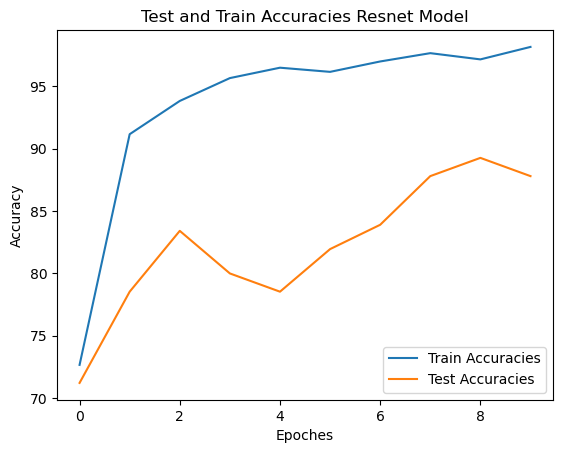

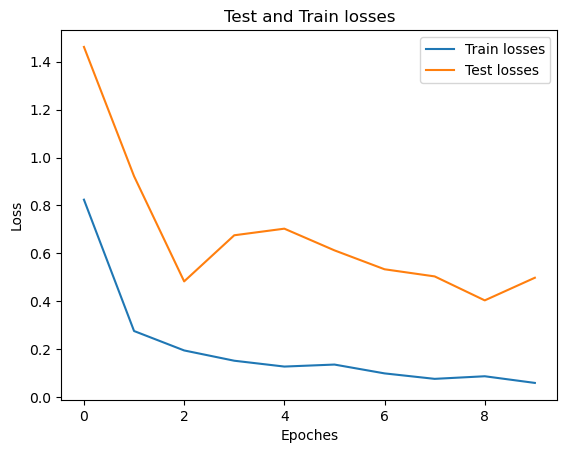

In [30]:
#plotting the accuracies and losses of the resnet model
import matplotlib.pyplot as plt
results_resnet =  model_resnets[1]
plt.plot(results_resnet['Train Accuracy'], label = 'Train Accuracies')
plt.plot(results_resnet['Test Accuracy'],label = 'Test Accuracies')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test and Train Accuracies Resnet Model')
plt.show()

plt.plot(results_resnet['Train Loss'], label = 'Train losses')
plt.plot(results_resnet['Test Loss'],label = 'Test losses')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('Test and Train losses')
plt.show()

Inference:

•	On training over 10 epochs, the ResNet18 model shows an increase in training accuracy, from 72.67% to 98.17%. 

•	Test accuracy also shows an increase, from 71.22% to 89.27%. Train losses gradually decrease, while test losses also decrease with certain variables. 

•	Each class's precision and recall parameters reflect model performance variations across classes. 

•	By the final epoch, both metrics improve significantly for most classes, indicating an increase in model robustness and generalizability.



In [ ]:
model_vggs = train_model(model_vgg, train_loader, test_loader) #vgg models training

Epoch 1/10 - Train Accuracy: 4.83% Test Accuracy: 5.85%
Epoch 2/10 - Train Accuracy: 5.00% Test Accuracy: 5.37%
Epoch 3/10 - Train Accuracy: 8.33% Test Accuracy: 6.34%
Epoch 4/10 - Train Accuracy: 9.17% Test Accuracy: 8.78%
Epoch 5/10 - Train Accuracy: 11.17% Test Accuracy: 9.76%
Epoch 6/10 - Train Accuracy: 14.67% Test Accuracy: 17.56%
Epoch 7/10 - Train Accuracy: 21.17% Test Accuracy: 20.00%
Epoch 8/10 - Train Accuracy: 25.00% Test Accuracy: 20.98%


Inference:

The VGG model shows gradual improvement in both train and test accuracy over the epochs. Train accuracy increases from 4.83% to 25.00%, while test accuracy improves from 5.85% to 20.98%

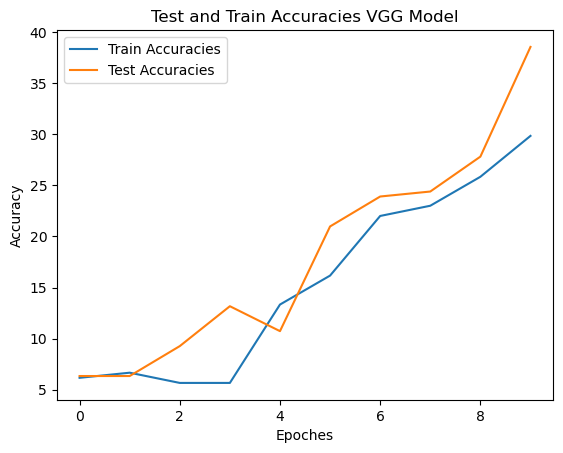

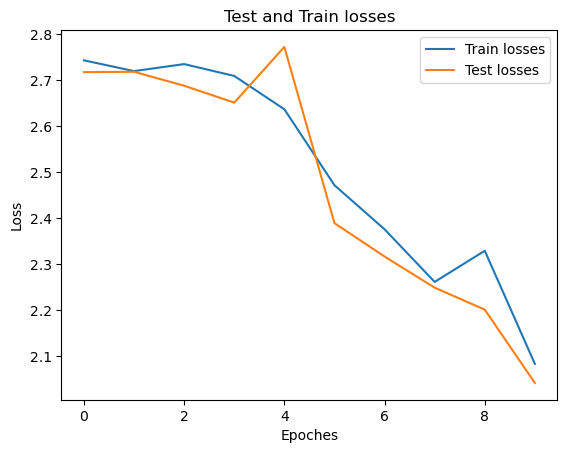

In [269]:
#plotting the accuracies and losses of the VGG19 model
results_resnet =  model_vggs[1]
plt.plot(results_resnet['train_accuracies'], label = 'Train Accuracies')
plt.plot(results_resnet['test_accuracies'],label = 'Test Accuracies')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test and Train Accuracies VGG Model')
plt.show()

plt.plot(results_resnet['train_losses'], label = 'Train losses')
plt.plot(results_resnet['test_losses'],label = 'Test losses')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.title('Test and Train losses')
plt.show()

In [37]:
model_densenet.to(device)
# Load the saved state dictionary for DenseNet121
model_densenets= model_densenet.load_state_dict(torch.load('densenets_trained_model.pth'))

In [38]:
model_densenets = train_model(model_densenet, train_loader, test_loader)  #densenet model train

Epoch 1/10 - Train Accuracy: 94.17% Test Accuracy: 70.73%
Epoch 2/10 - Train Accuracy: 94.67% Test Accuracy: 82.93%
Epoch 3/10 - Train Accuracy: 97.00% Test Accuracy: 84.88%
Epoch 4/10 - Train Accuracy: 95.50% Test Accuracy: 82.44%
Epoch 5/10 - Train Accuracy: 95.00% Test Accuracy: 85.85%
Epoch 6/10 - Train Accuracy: 97.17% Test Accuracy: 82.93%
Epoch 7/10 - Train Accuracy: 98.33% Test Accuracy: 90.73%
Epoch 8/10 - Train Accuracy: 98.67% Test Accuracy: 78.54%
Epoch 9/10 - Train Accuracy: 98.67% Test Accuracy: 92.20%
Epoch 10/10 - Train Accuracy: 99.00% Test Accuracy: 91.71%


In [39]:
model_densenets[1]

Epoch  Train Loss  Test Loss  Train Accuracy  Test Accuracy  \
0      1    0.192636   0.944474       94.166667      70.731707   
1      2    0.193296   0.677891       94.666667      82.926829   
2      3    0.125052   0.434194       97.000000      84.878049   
3      4    0.129312   0.596834       95.500000      82.439024   
4      5    0.133167   0.686752       95.000000      85.853659   
5      6    0.084974   0.529489       97.166667      82.926829   
6      7    0.054022   0.289134       98.333333      90.731707   
7      8    0.049436   0.718191       98.666667      78.536585   
8      9    0.066343   0.252711       98.666667      92.195122   
9     10    0.029642   0.288300       99.000000      91.707317   

                                 Precision per Class  \
0  [0.8461538461538461, 1.0, 0.8888888888888888, ...   
1  [1.0, 1.0, 0.7272727272727273, 0.6, 0.69230769...   
2  [0.75, 0.9230769230769231, 0.7142857142857143,...   
3  [1.0, 1.0, 0.9, 0.3157894736842105, 0.83333333...   
4  [1.0, 1.0, 0.8333333333333334, 0.8333333333333...   
5  [1.0, 0.5384615384615384, 1.0, 0.7, 0.75, 1.0,...   
6  [1.0, 1.0, 0.7142857142857143, 0.5625, 0.75, 0...   
7  [0.625, 0.9090909090909091, 0.6666666666666666...   
8  [0.8333333333333334, 0.875, 1.0, 0.61538461538...   
9  [1.0, 0.9230769230769231, 1.0, 0.4761904761904...   

                                    Recall per Class  
0  [0.7333333333333333, 0.5714285714285714, 0.8, ...  
1  [0.8666666666666667, 0.9285714285714286, 0.8, ...  
2  [1.0, 0.8571428571428571, 1.0, 0.3, 0.63636363...  
3  [1.0, 0.35714285714285715, 0.9, 0.6, 0.4545454...  
4  [1.0, 0.9285714285714286, 1.0, 0.5, 0.72727272...  
5  [0.9333333333333333, 1.0, 1.0, 0.7, 0.81818181...  
6  [1.0, 0.9285714285714286, 1.0, 0.9, 0.54545454...  
7  [1.0, 0.7142857142857143, 0.8, 0.5, 0.54545454...  
8  [1.0, 1.0, 1.0, 0.8, 0.7272727272727273, 1.0, ...  
9  [1.0, 0.8571428571428571, 1.0, 1.0, 0.54545454...

DenseNet Inference: 

•	On training over 10 epochs, the model exhibits a steady improvement as training accuracy increases from 94.17% to 99%.

•	Test accuracy follows a similar trend, improving from 70.73% to a maximum of 92.20%. However, the experimental loss is variable, increasing mainly at time 8 before consolidation. 

•	The precision and recall metrics in each class exhibit variability. In general, the model shows high accuracy and recall for many classes, and there is a remarkable improvement in both metrics until the final period. 

•	Overall performance shows effective curriculum and flexibility, although at times, it shows signs of overfitting. Early stopping can be employed to as the test loss increases in the final epochs.


# Model Evaluation On Test images

In [33]:
#code to visualise the images tested
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    return image

def predict_single_image(model, image_path, class_names):
    model.eval()
    image = preprocess_image(image_path)
    image = image.unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_index = predicted.item()
        predicted_label = class_names[predicted_index]

    return predicted_label

def visualize_predictions(model, test_dir, num_images=6):
    # Read class names directly from the directory structure
    class_dirs = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]
    class_names = sorted(class_dirs)  # Ensure class names are sorted alphabetically

    # Get a list of all images in the test directory
    all_images = []
    for class_dir in class_dirs:
        class_path = os.path.join(test_dir, class_dir)
        images = os.listdir(class_path)
        for img in images:
            all_images.append((os.path.join(class_path, img), class_dir))

    # Randomly select a few images
    selected_images = random.sample(all_images, num_images)

    plt.figure(figsize=(15, 10))
    for i, (img_path, actual_label) in enumerate(selected_images):
        predicted_label = predict_single_image(model, img_path, class_names)
        
        plt.subplot(2, 3, i + 1)
        img = Image.open(img_path).convert("RGB")
        plt.imshow(img)
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Evaluation RestNet18 Model

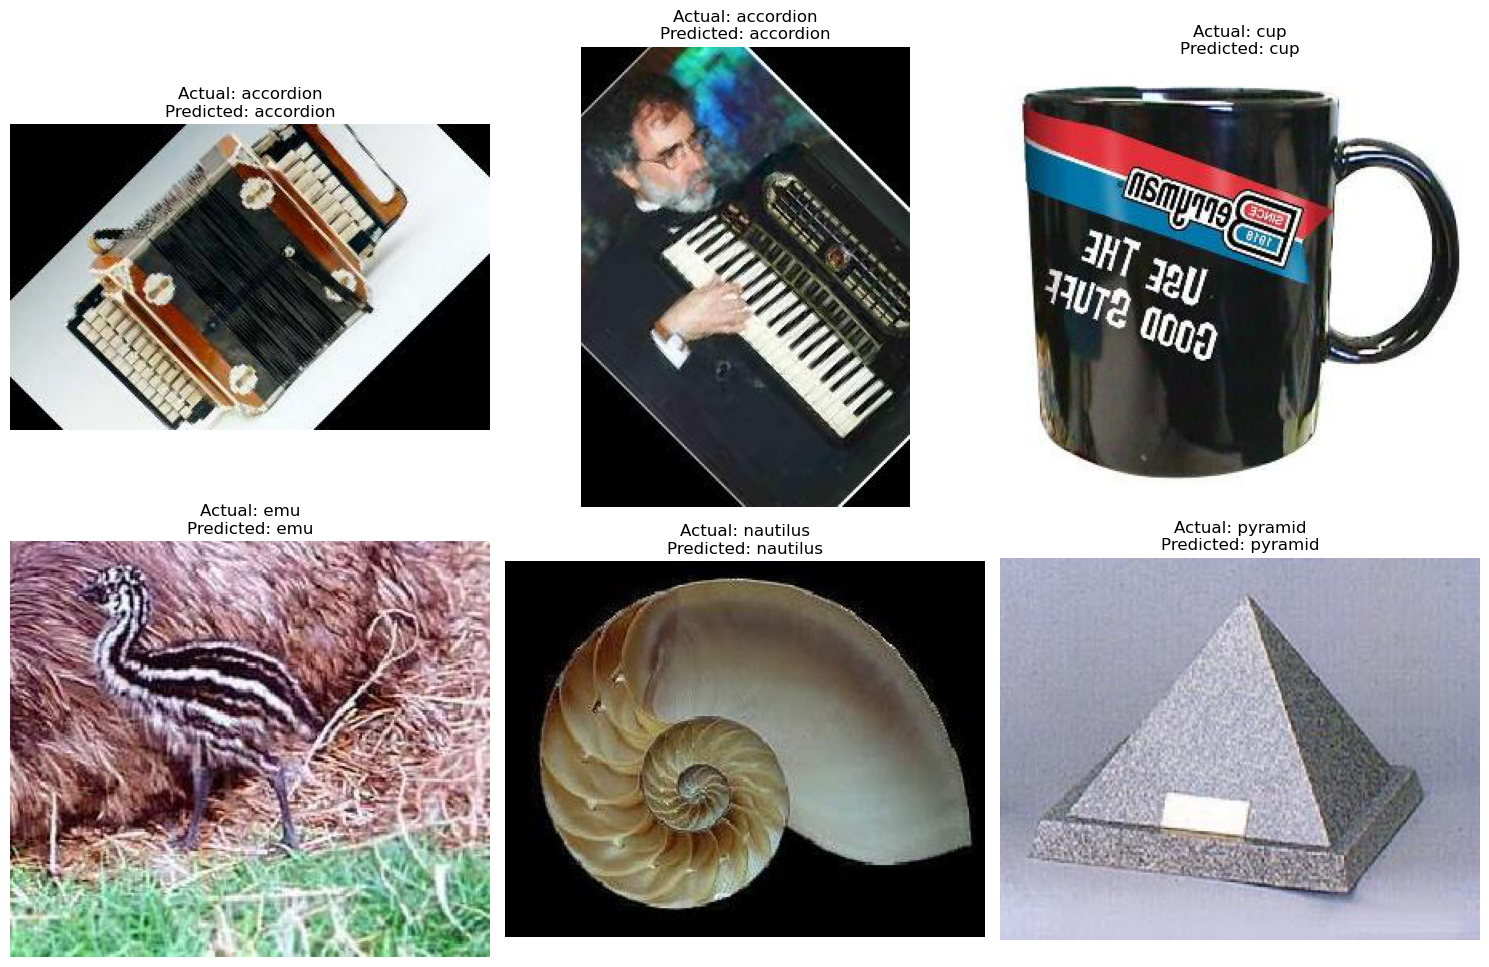

In [46]:
visualize_predictions(model_resnets[0], r'C:\Users\Admin\Downloads\dataset1\test', num_images=6)

6/6 Images are correctly predicted 

# Evaluation on Denset121 Model

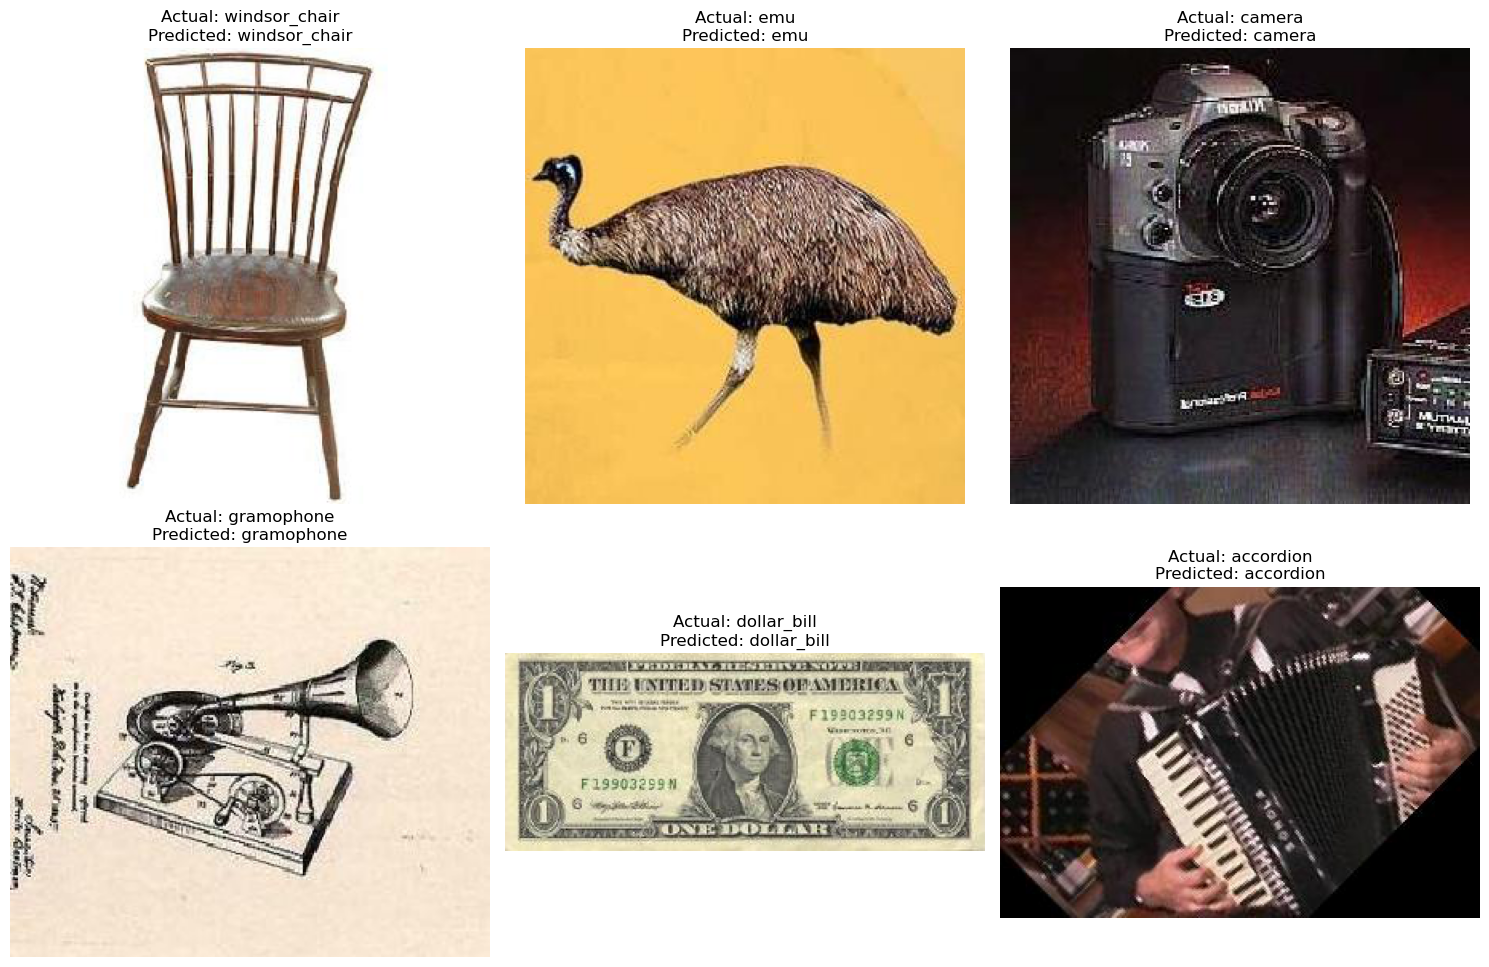

In [34]:
visualize_predictions(model_densenets[0], r'C:\Users\Admin\Downloads\dataset1\test', num_images=6)


6/6 Images are correctly predicted

# VGG19 Evaluation

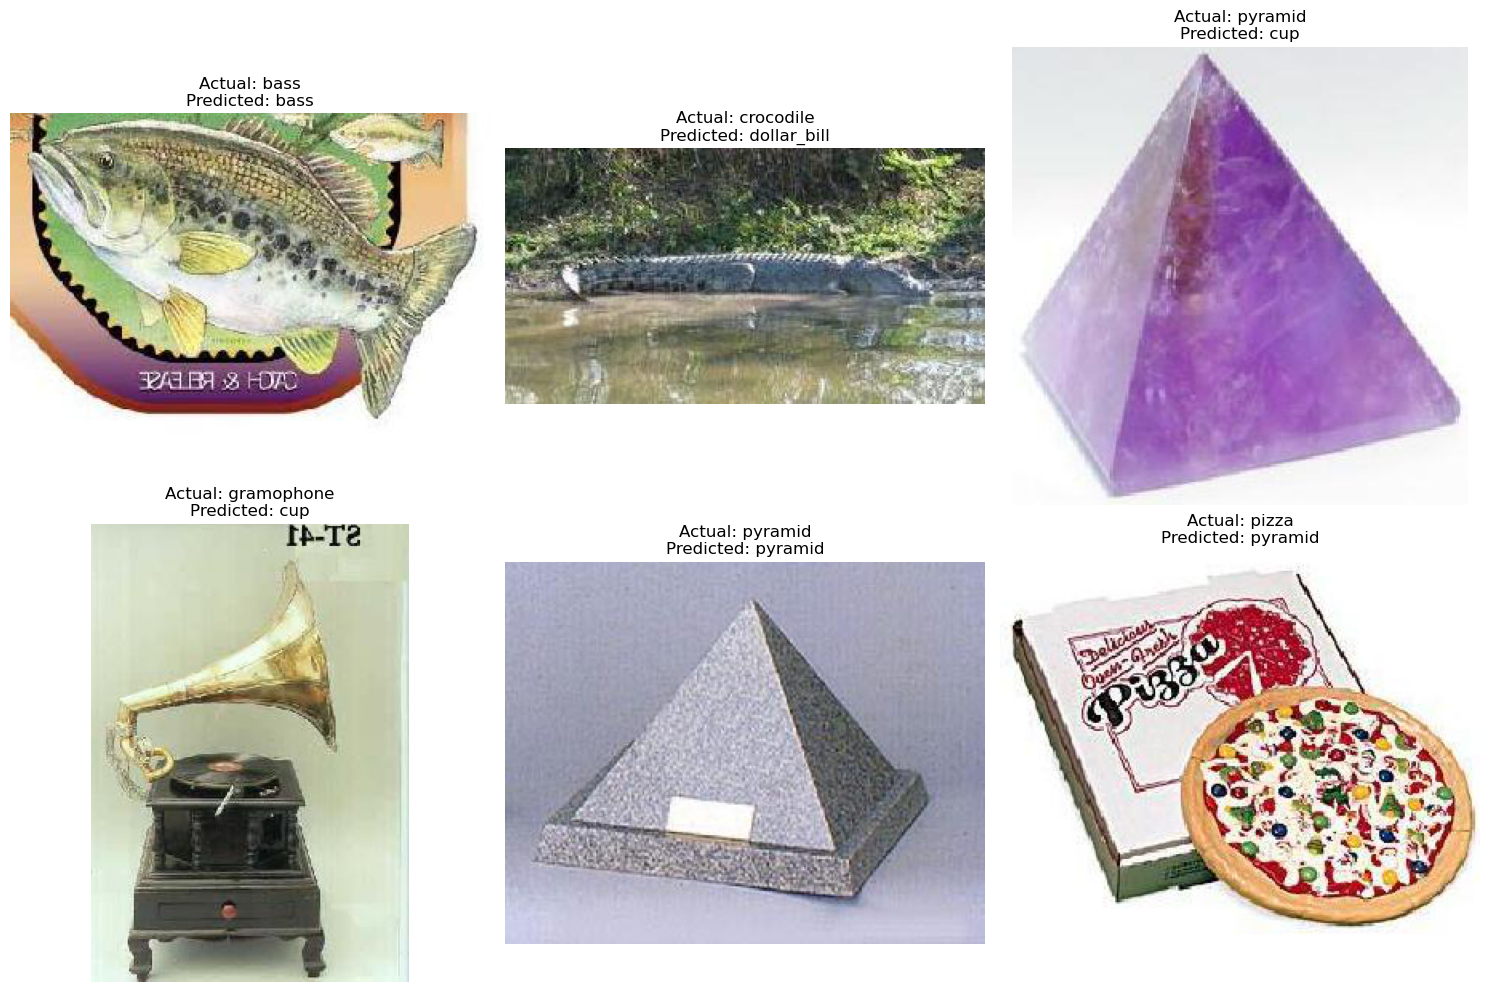

In [236]:
visualize_predictions(model_vggs[0], test_dir, class_names, num_images=6)


2/6 Images are correctly predicted

Saving models to reuse and avoid retraining 

In [248]:
torch.save(model_resnets[0].state_dict(), 'trained_resnet_model.pth')
torch.save(model_vggs[0].state_dict(),'vggs_trained_model.pth')
torch.save(model_densenets[0].state_dict(),'densenets_trained_model.pth')

In [11]:
# Set the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Number of classes in your dataset
num_classes = 15

# Load the saved state dictionary for ResNet18
model_resnet.load_state_dict(torch.load('trained_resnet_model.pth'))

# Load the saved state dictionary for DenseNet121
model_densenet.load_state_dict(torch.load('densenets_trained_model.pth'))

# Load the saved state dictionary for VGG19
model_vgg.load_state_dict(torch.load('vggs_trained_model.pth'))

print("Models are loaded and moved to the device successfully.")

# Define transforms for the test dataset
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create the test dataset and data loader
test_dataset = ImageFolder('dataset1/test', transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Function to evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    accuracy = correct / total
    precision, recall, _, _ = precision_recall_fscore_support(all_labels, all_preds, average=None, labels=range(num_classes))
    
    return accuracy, precision, recall

# Evaluate ResNet model
accuracy_resnet, precision_resnet, recall_resnet = evaluate_model(model_resnet, test_loader)
print(f'ResNet - Accuracy: {accuracy_resnet*100:.2f}%, Precision per class: {precision_resnet}, Recall per class: {recall_resnet}')

# Evaluate DenseNet model
accuracy_densenet, precision_densenet, recall_densenet = evaluate_model(model_densenet, test_loader)
print(f'DenseNet - Accuracy: {accuracy_densenet*100:.2f}%, Precision per class: {precision_densenet}, Recall per class: {recall_densenet}')

# Evaluate VGG model
accuracy_vgg, precision_vgg, recall_vgg = evaluate_model(model_vgg, test_loader)
print(f'VGG - Accuracy: {accuracy_vgg*100:.2f}%, Precision per class: {precision_vgg}, Recall per class: {recall_vgg}')


Models are loaded and moved to the device successfully.
ResNet - Accuracy: 74.63%, Precision per class: [1.         1.         1.         0.6        0.77777778 0.65217391
 0.85714286 0.5        1.         0.73684211 0.4516129  0.92307692
 0.88888889 1.         1.        ], Recall per class: [0.13333333 0.71428571 0.4        0.6        0.63636364 0.88235294
 1.         0.84615385 0.45454545 1.         0.93333333 0.92307692
 0.94117647 0.52941176 1.        ]
DenseNet - Accuracy: 89.27%, Precision per class: [0.875      1.         0.9        0.57142857 1.         1.
 1.         0.86666667 0.91666667 0.8125     1.         0.66666667
 1.         0.92307692 1.        ], Recall per class: [0.93333333 1.         0.9        0.8        0.72727273 0.88235294
 0.91666667 1.         1.         0.92857143 0.73333333 0.92307692
 0.94117647 0.70588235 1.        ]
VGG - Accuracy: 38.54%, Precision per class: [0.60869565 0.33333333 0.17391304 0.         0.         0.3
 0.64705882 0.5        0.33333333 0

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
